In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('D:/NEU/ALY6980/med.csv')
df.head(6)
df['testname'] = df.testname.apply(lambda x: x.rsplit('_', 1)[0])

df.head()

,chnm,Classification,casn,CmaxStand,testname,EC,tgt_abbr
0,cladribine,AmbiDILIDrugs,4291-63-8,0.0227,ACEA_T47D_80hr_Negative,0.086121,ESR1
1,colchicine,AmbiDILIDrugs,64-86-8,0.0163,ACEA_T47D_80hr_Negative,0.001842,ESR1
2,disulfiram,MostDILI Drugs,97-77-8,5.4000,ACEA_T47D_80hr_Negative,21.760705,ESR1
3,estrone,AmbiDILIDrugs,53-16-7,0.0218,ACEA_T47D_80hr_Positive,0.008975,ESR1
4,norethindrone,AmbiDILIDrugs,68-22-4,0.0328,ACEA_T47D_80hr_Positive,0.006005,ESR1


In [3]:
from matplotlib import pyplot as plt

up = df[df.testname.str.contains('up')]
down = df[(df.testname.str.contains('down')) | (df.testname.str.contains('dn'))]

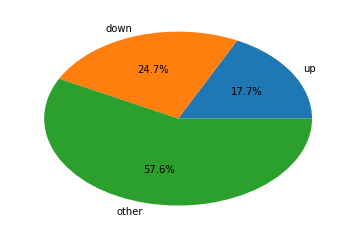

In [4]:
labels = ['up', 'down', 'other']
sizes = [len(up), len(down), len(df) - len(up) - len(down)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
plt.show()

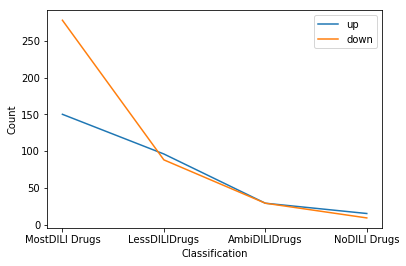

In [5]:
plt.plot(up.Classification.value_counts())
plt.plot(down.Classification.value_counts())
plt.xlabel('Classification')
plt.ylabel('Count')
plt.legend(['up', 'down'])
plt.show()

In [6]:
up_des = up[['EC']].describe()
up_des['index'] = up_des.index
up_des.rename(columns={'EC': 'EC_up'}, inplace=True)
down_des = down[['EC']].describe()
down_des['index'] = down_des.index
down_des.rename(columns={'EC': 'EC_down'}, inplace=True)
des_df = pd.merge(up_des, down_des, on='index')
des_df.set_index('index', inplace=True)
des_df

,EC_up,EC_down
index,,
count,290.000000,404.000000
mean,18.792142,14.792232
std,27.895121,18.048510
min,0.000900,0.000631
25%,0.762684,3.131787
50%,7.113796,11.891007
75%,21.685469,20.451309
max,127.359783,163.568570


<Figure size 720x576 with 0 Axes>

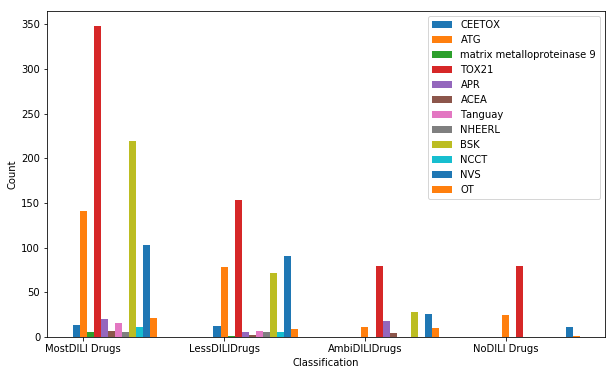

In [7]:
plt.figure(figsize=(10, 8))
substr = list(set(i[0] for i in df.testname.str.split('_')))
ind = np.arange(4) * 2
width = 0.1
xlabel = ['MostDILI Drugs', 'LessDILIDrugs', 'AmbiDILIDrugs', 'NoDILI Drugs']
fig, ax = plt.subplots(figsize=(10, 6))
for i, v in enumerate(substr):
    count = df[df.testname.str.startswith(v)].Classification.value_counts().reindex(xlabel).fillna(0).values
    ax.bar(ind + width * i, count, width)

ax.set_xticks(ind + width)
ax.set_xticklabels(xlabel)
plt.xlabel('Classification')
plt.ylabel('Count')
plt.legend(substr)
plt.show()